In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from apyori import apriori

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

In [ ]:
dataframe = pd.read_csv('LaundryData_2021_T2.csv')
#showing our initial dataframe here
dataframe

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,NaN,male,thin,32.0,no,no_kids,big,NaN,...,short_sleeve,blue_jeans,long,NaN,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,NaN,4,10,no,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,NaN,34.0,no,no_kids,big,blue,...,NaN,white,long,clothes,3,9,NaN,2.903530,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.643060,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.136530,101.699091,1.0


In [ ]:
dataframe.isnull().sum()

Date                0
Time                0
Race              198
Gender            177
Body_Size         183
Age_Range         143
With_Kids         186
Kids_Category      30
Basket_Size       205
Basket_colour     203
Attire            217
Shirt_Colour      174
shirt_type        185
Pants_Colour      174
pants_type          9
Wash_Item         181
Washer_No           0
Dryer_No            0
Spectacles        209
latitude            0
longitude           0
Num_of_Baskets    182
dtype: int64

In [ ]:
dataframe.isnull().sum() * 100 / len(dataframe)

Date              0.000
Time              0.000
Race              4.950
Gender            4.425
Body_Size         4.575
Age_Range         3.575
With_Kids         4.650
Kids_Category     0.750
Basket_Size       5.125
Basket_colour     5.075
Attire            5.425
Shirt_Colour      4.350
shirt_type        4.625
Pants_Colour      4.350
pants_type        0.225
Wash_Item         4.525
Washer_No         0.000
Dryer_No          0.000
Spectacles        5.225
latitude          0.000
longitude         0.000
Num_of_Baskets    4.550
dtype: float64

In [ ]:
dataframe.dtypes

Date               object
Time               object
Race               object
Gender             object
Body_Size          object
Age_Range         float64
With_Kids          object
Kids_Category      object
Basket_Size        object
Basket_colour      object
Attire             object
Shirt_Colour       object
shirt_type         object
Pants_Colour       object
pants_type         object
Wash_Item          object
Washer_No           int64
Dryer_No            int64
Spectacles         object
latitude          float64
longitude         float64
Num_of_Baskets    float64
dtype: object

In [ ]:
dataframe.describe()

,Age_Range,Washer_No,Dryer_No,latitude,longitude,Num_of_Baskets
count,3857.000000,4000.000000,4000.000000,4000.000000,4000.000000,3818.000000
mean,39.407830,4.497500,8.462500,3.067411,101.635865,1.996595
std,11.866384,1.126637,1.111487,0.078564,0.100511,0.817184
min,18.000000,3.000000,7.000000,2.903209,101.379200,1.000000
25%,30.000000,3.000000,7.000000,3.010391,101.580313,1.000000
50%,40.000000,5.000000,8.000000,3.086816,101.658639,2.000000
75%,49.000000,6.000000,9.000000,3.126352,101.708042,3.000000
max,60.000000,6.000000,10.000000,3.197823,101.787492,3.000000


In [ ]:
dataframe.describe(include='object')

,Date,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Spectacles
count,4000,4000,3802,3823,3817,3814,3970,3795,3797,3783,3826,3815,3826,3991,3819,3791
unique,116,3643,4,2,3,2,5,2,11,3,12,2,15,2,2,2
top,29/11/2015,4:03:48,malay,female,moderate,no,no_kids,big,white,casual,white,short_sleeve,black,long,clothes,no
freq,134,12,1024,1931,1304,2109,1294,2197,506,1531,439,2106,497,2167,2158,2134


### Association Rule Mining

In [ ]:
df = dataframe[['With_Kids', 'Attire', 'Shirt_Colour', 'shirt_type', 'Pants_Colour', 'pants_type']]
df

,With_Kids,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type
0,yes,casual,blue,short_sleeve,black,short
1,no,casual,white,short_sleeve,blue_jeans,long
2,no,casual,red,short_sleeve,black,long
3,no,casual,black,short_sleeve,yellow,short
4,no,casual,blue,NaN,white,long
...,...,...,...,...,...,...
3995,yes,traditional,purple,short_sleeve,white,long
3996,yes,formal,black,long sleeve,black,short
3997,yes,casual,white,long sleeve,green,short
3998,yes,traditional,blue,short_sleeve,blue,long


In [ ]:
col_list = df.columns
df_oh = df[col_list]
df = df.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df = pd.concat([df, df_oh], axis=1)
df.head()

,With_Kids_no,With_Kids_yes,Attire_casual,Attire_formal,Attire_traditional,Shirt_Colour_black,Shirt_Colour_black,Shirt_Colour_blue,Shirt_Colour_brown,Shirt_Colour_green,...,Pants_Colour_green,Pants_Colour_grey,Pants_Colour_orange,Pants_Colour_pink,Pants_Colour_purple,Pants_Colour_red,Pants_Colour_white,Pants_Colour_yellow,pants_type_long,pants_type_short
0,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df.shape

(4000, 36)

In [ ]:
records = []
for i in range(0, 4000):
    records.append([str(df.columns[j]) for j in range(0, 36) if df.values[i,j] == 1])

In [ ]:
records[0]

['With_Kids_yes',
 'Attire_casual',
 'Shirt_Colour_blue',
 'shirt_type_short_sleeve',
 'Pants_Colour_black',
 'pants_type_short']

In [ ]:
association_results = apriori(records)
association_results = list(association_results)

In [ ]:
len(association_results)

50

In [ ]:
association_results

[RelationRecord(items=frozenset({'Attire_casual'}), support=0.38275, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Attire_casual'}), confidence=0.38275, lift=1.0)]),
 RelationRecord(items=frozenset({'Attire_formal'}), support=0.29425, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Attire_formal'}), confidence=0.29425, lift=1.0)]),
 RelationRecord(items=frozenset({'Attire_traditional'}), support=0.26875, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Attire_traditional'}), confidence=0.26875, lift=1.0)]),
 RelationRecord(items=frozenset({'Pants_Colour_black'}), support=0.12425, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pants_Colour_black'}), confidence=0.12425, lift=1.0)]),
 RelationRecord(items=frozenset({'Shirt_Colour_white'}), support=0.10975, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Shirt_Colou

In [ ]:
cnt = 0

for item in association_results:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    if len(items) < 2:
        print("(Rule " + str(cnt) + ") " + items[0])
    else:
        print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])
    
    # second index of the inner list
    print("Support: " + str(round(item[1],3)))
    
    # third index of the list located at 0th
    # of the third index of the inner list 
    
    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

(Rule 1) Attire_casual
Support: 0.383
Confidence: 0.3827
Lift: 1.0
(Rule 2) Attire_formal
Support: 0.294
Confidence: 0.2943
Lift: 1.0
(Rule 3) Attire_traditional
Support: 0.269
Confidence: 0.2687
Lift: 1.0
(Rule 4) Pants_Colour_black
Support: 0.124
Confidence: 0.1242
Lift: 1.0
(Rule 5) Shirt_Colour_white
Support: 0.11
Confidence: 0.1098
Lift: 1.0
(Rule 6) With_Kids_no
Support: 0.527
Confidence: 0.5272
Lift: 1.0
(Rule 7) With_Kids_yes
Support: 0.426
Confidence: 0.4263
Lift: 1.0
(Rule 8) pants_type_long
Support: 0.542
Confidence: 0.5417
Lift: 1.0
(Rule 9) pants_type_short
Support: 0.456
Confidence: 0.456
Lift: 1.0
(Rule 10) shirt_type_long sleeve
Support: 0.427
Confidence: 0.4273
Lift: 1.0
(Rule 11) shirt_type_short_sleeve
Support: 0.526
Confidence: 0.5265
Lift: 1.0
(Rule 12) With_Kids_no -> Attire_casual
Support: 0.219
Confidence: 0.219
Lift: 1.0
(Rule 13) With_Kids_yes -> Attire_casual
Support: 0.144
Confidence: 0.1442
Lift: 1.0
(Rule 14) pants_type_long -> Attire_casual
Support: 0.215

### Imputation

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
imputed_data = imp.fit_transform(dataframe)

In [ ]:
new_df = dataframe.copy()

In [ ]:
new_df.iloc[:,:-1] = imp.fit_transform(new_df.iloc[:,:-1])

In [ ]:
new_df

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,malay,male,thin,32.0,no,no_kids,big,white,...,short_sleeve,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,clothes,4,10,no,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,big,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,short_sleeve,white,long,clothes,3,9,no,2.903530,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.643060,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.136530,101.699091,1.0


In [ ]:
new_df1 = dataframe.copy()

In [ ]:
new_df1.loc[:, new_df1.columns != 'Age_Range']  = imp.fit_transform(new_df1.loc[:, new_df1.columns != 'Age_Range'])

In [ ]:
new_df1

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,malay,male,thin,32.0,no,no_kids,big,white,...,short_sleeve,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,clothes,4,10,no,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,big,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,short_sleeve,white,long,clothes,3,9,no,2.903530,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.643060,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.136530,101.699091,1.0


In [ ]:
dataframe = pd.DataFrame(imputed_data, columns = dataframe.columns)

In [ ]:
dataframe

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,malay,male,thin,32.0,no,no_kids,big,white,...,short_sleeve,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,clothes,4,10,no,2.935533,101.73717,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,big,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,short_sleeve,white,long,clothes,3,9,no,2.90353,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.64306,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.13653,101.699091,1.0


In [ ]:
dataframe.isnull().sum()

Date              0
Time              0
Race              0
Gender            0
Body_Size         0
Age_Range         0
With_Kids         0
Kids_Category     0
Basket_Size       0
Basket_colour     0
Attire            0
Shirt_Colour      0
shirt_type        0
Pants_Colour      0
pants_type        0
Wash_Item         0
Washer_No         0
Dryer_No          0
Spectacles        0
latitude          0
longitude         0
Num_of_Baskets    0
dtype: int64

In [ ]:
new_df.isnull().sum()

Date                0
Time                0
Race                0
Gender              0
Body_Size           0
Age_Range           0
With_Kids           0
Kids_Category       0
Basket_Size         0
Basket_colour       0
Attire              0
Shirt_Colour        0
shirt_type          0
Pants_Colour        0
pants_type          0
Wash_Item           0
Washer_No           0
Dryer_No            0
Spectacles          0
latitude            0
longitude           0
Num_of_Baskets    182
dtype: int64

In [ ]:
new_df1.isnull().sum()

Date                0
Time                0
Race                0
Gender              0
Body_Size           0
Age_Range         143
With_Kids           0
Kids_Category       0
Basket_Size         0
Basket_colour       0
Attire              0
Shirt_Colour        0
shirt_type          0
Pants_Colour        0
pants_type          0
Wash_Item           0
Washer_No           0
Dryer_No            0
Spectacles          0
latitude            0
longitude           0
Num_of_Baskets      0
dtype: int64

### K Means Clustering

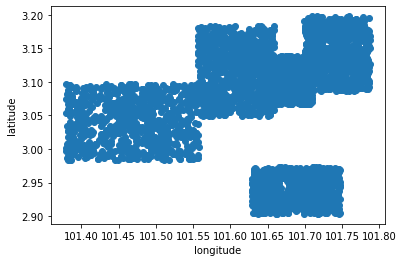

In [93]:
coordinate = plt.scatter(dataframe['longitude'],dataframe['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')
coordinate.figure.savefig('Coordinate.png')
coordinate

In [94]:
def plot_kmeans_scatter(v1, v2):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(v1, v2, c=kmeans_labels[0],s=50,cmap='autumn',alpha=0.7)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(v1.name)
    ax.set_ylabel(v2.name)
    plt.colorbar(scatter)
    plt.show()
    ax.figure.savefig('K-Means.png')

In [95]:
x = dataframe[['longitude', 'latitude']]
ss = StandardScaler()
X = ss.fit_transform(x)

print(X) 

[[ 0.21973111 -1.97435428]
 [ 0.07228199 -1.84464068]
 [ 1.00802177 -1.67880246]
 ...
 [ 0.07158849  0.42822889]
 [ 0.62911819  0.87987811]
 [ 0.65056113  0.74914829]]


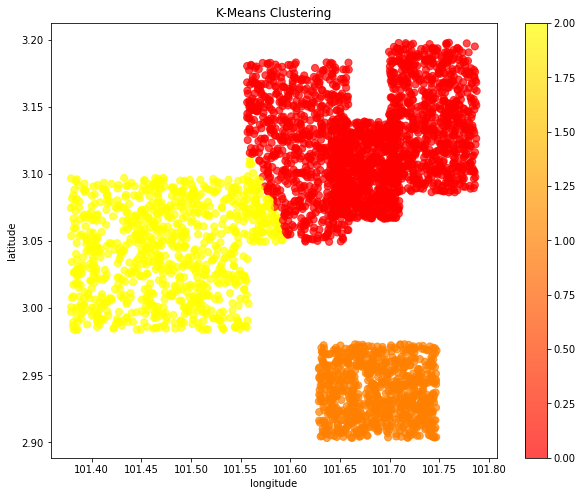

In [96]:
model = KMeans(n_clusters = 3, verbose=0)   #build the model
model.fit(X)

kmeans_labels = pd.DataFrame(model.labels_)   # put into a DataFrame. We will use this shortly...

plot_kmeans_scatter(dataframe['longitude'], dataframe['latitude'])

In [97]:
kmeans = KMeans(3)
kmeans.fit(x)
clusters = kmeans.fit_predict(x)

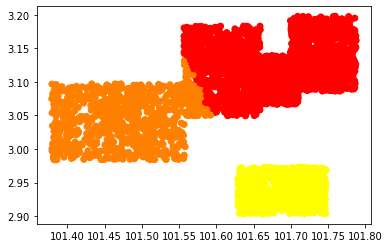

In [98]:
df_clusters = dataframe.copy()
df_clusters['Clusters'] = clusters 
plt.scatter(df_clusters['longitude'],df_clusters['latitude'],c=df_clusters['Clusters'],cmap='autumn')

### Dropna for number of baskets

In [51]:
new_df.dropna(subset=['Num_of_Baskets'], inplace=True)

In [52]:
new_df.isnull().sum()

Date              0
Time              0
Race              0
Gender            0
Body_Size         0
Age_Range         0
With_Kids         0
Kids_Category     0
Basket_Size       0
Basket_colour     0
Attire            0
Shirt_Colour      0
shirt_type        0
Pants_Colour      0
pants_type        0
Wash_Item         0
Washer_No         0
Dryer_No          0
Spectacles        0
latitude          0
longitude         0
Num_of_Baskets    0
dtype: int64

In [53]:
new_df.shape

(3818, 22)

In [54]:
new_df.dtypes

Date               object
Time               object
Race               object
Gender             object
Body_Size          object
Age_Range         float64
With_Kids          object
Kids_Category      object
Basket_Size        object
Basket_colour      object
Attire             object
Shirt_Colour       object
shirt_type         object
Pants_Colour       object
pants_type         object
Wash_Item          object
Washer_No           int64
Dryer_No            int64
Spectacles         object
latitude          float64
longitude         float64
Num_of_Baskets    float64
dtype: object

### Dropna for Age_Range

In [55]:
new_df1.dropna(subset=['Age_Range'], inplace=True)

In [56]:
new_df1.isnull().sum()

Date              0
Time              0
Race              0
Gender            0
Body_Size         0
Age_Range         0
With_Kids         0
Kids_Category     0
Basket_Size       0
Basket_colour     0
Attire            0
Shirt_Colour      0
shirt_type        0
Pants_Colour      0
pants_type        0
Wash_Item         0
Washer_No         0
Dryer_No          0
Spectacles        0
latitude          0
longitude         0
Num_of_Baskets    0
dtype: int64

In [57]:
new_df1.shape

(3857, 22)

In [58]:
new_df2 = new_df1.copy()

In [59]:
dataframe['Age_Range'] = dataframe.Age_Range.astype(float)
dataframe['Washer_No'] = dataframe.Washer_No.astype(np.int64)
dataframe['Dryer_No'] = dataframe.Dryer_No.astype(np.int64)
dataframe['latitude'] = dataframe.latitude.astype(float)
dataframe['longitude'] = dataframe.longitude.astype(float)
dataframe['Num_of_Baskets'] = dataframe.Num_of_Baskets.astype(float)

In [60]:
dataframe.dtypes

Date               object
Time               object
Race               object
Gender             object
Body_Size          object
Age_Range         float64
With_Kids          object
Kids_Category      object
Basket_Size        object
Basket_colour      object
Attire             object
Shirt_Colour       object
shirt_type         object
Pants_Colour       object
pants_type         object
Wash_Item          object
Washer_No           int64
Dryer_No            int64
Spectacles         object
latitude          float64
longitude         float64
Num_of_Baskets    float64
dtype: object

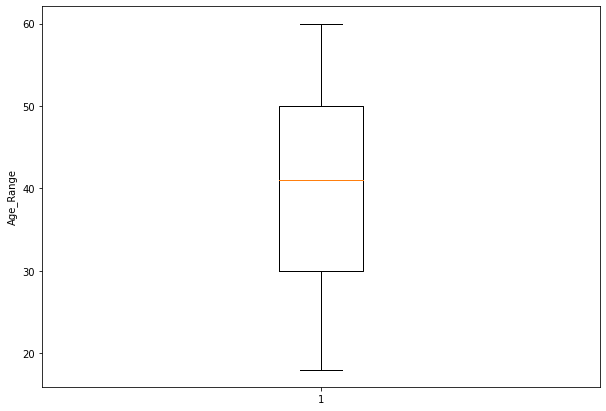

In [61]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(dataframe['Age_Range'])

plt.ylabel('Age_Range')
# show plot
plt.show()

### Correlation

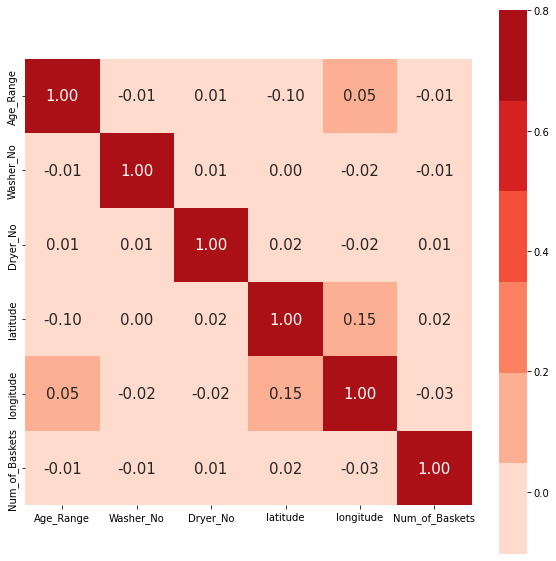

In [62]:
cor = new_df.corr()
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(cor , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))
fig = heat_map.get_figure()
fig.savefig("Correlation.png") 

### Binning for Age Range

In [63]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
new_df1['Binned_Age_Range'] = pd.cut(new_df1['Age_Range'], bins)
new_df1

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets,Binned_Age_Range
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,black,short,clothes,3,10,no,2.912316,101.657948,1.0,"(20, 30]"
1,19/10/2015,20:28:42,malay,male,thin,32.0,no,no_kids,big,white,...,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0,"(30, 40]"
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,black,long,clothes,4,10,no,2.935533,101.737170,1.0,"(20, 30]"
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,big,black,...,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0,"(50, 60]"
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,white,long,clothes,3,9,no,2.903530,101.661249,3.0,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,white,long,blankets,6,7,yes,3.082212,101.644878,2.0,"(20, 30]"
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,black,short,clothes,4,10,yes,3.118138,101.677315,3.0,"(20, 30]"
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,green,short,clothes,4,9,no,3.101051,101.643060,1.0,"(20, 30]"
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,blue,long,blankets,6,10,no,3.136530,101.699091,1.0,"(10, 20]"


<AxesSubplot:ylabel='Frequency'>

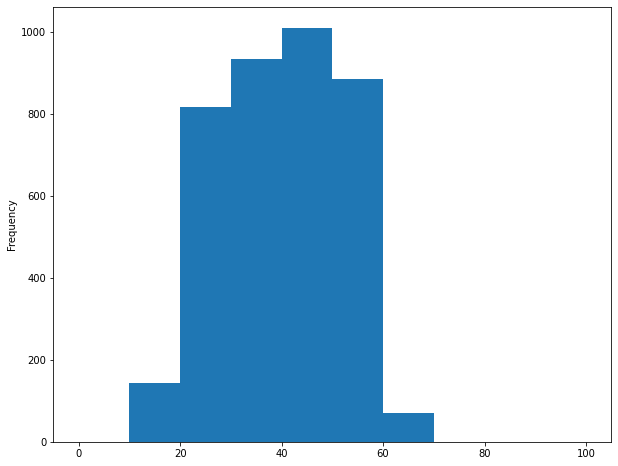

In [64]:
new_df1['Age_Range'].plot(kind="hist", bins = bins, figsize=(10,8))

In [65]:
new_df1 = new_df1.drop("Age_Range", 1)
new_df1

,Date,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,...,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets,Binned_Age_Range
0,19/10/2015,20:17:50,malay,male,moderate,yes,young,big,red,casual,...,black,short,clothes,3,10,no,2.912316,101.657948,1.0,"(20, 30]"
1,19/10/2015,20:28:42,malay,male,thin,no,no_kids,big,white,casual,...,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0,"(30, 40]"
2,19/10/2015,20:58:31,malay,female,moderate,no,no_kids,big,blue,casual,...,black,long,clothes,4,10,no,2.935533,101.737170,1.0,"(20, 30]"
3,19/10/2015,21:31:28,indian,male,thin,no,no_kids,big,black,casual,...,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0,"(50, 60]"
4,19/10/2015,21:40:28,indian,male,moderate,no,no_kids,big,blue,casual,...,white,long,clothes,3,9,no,2.903530,101.661249,3.0,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,yes,no_kids,small,yellow,traditional,...,white,long,blankets,6,7,yes,3.082212,101.644878,2.0,"(20, 30]"
3996,2015-12-26,01:48:15,malay,male,moderate,yes,baby,small,green,formal,...,black,short,clothes,4,10,yes,3.118138,101.677315,3.0,"(20, 30]"
3997,2015-12-07,01:42:32,foreigner,male,thin,yes,no_kids,small,blue,casual,...,green,short,clothes,4,9,no,3.101051,101.643060,1.0,"(20, 30]"
3998,2016-02-10,00:24:23,indian,female,thin,yes,baby,big,black,traditional,...,blue,long,blankets,6,10,no,3.136530,101.699091,1.0,"(10, 20]"


### Label Encode and Prepare X, y

In [66]:
new_df = new_df.apply(LabelEncoder().fit_transform)
new_df

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,7,2835,3,1,1,10,1,4,0,8,...,1,0,1,1,0,3,0,91,1939,0
1,7,2861,3,1,2,14,0,1,0,9,...,1,5,0,1,3,2,0,210,1582,2
2,7,2946,3,0,1,12,0,1,0,1,...,1,0,0,1,1,3,0,353,3350,0
3,7,3024,2,1,2,33,0,1,0,0,...,1,14,1,1,2,2,0,496,1466,0
4,7,3042,2,1,1,16,0,1,0,1,...,1,13,0,1,0,2,0,3,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,63,3051,1,1,1,12,1,1,1,10,...,1,13,0,0,3,0,1,1799,1626,1
3996,34,214,3,1,1,6,1,0,1,3,...,0,1,1,1,1,3,1,2676,2294,2
3997,15,203,1,1,2,9,1,1,1,1,...,0,7,1,1,1,2,0,2297,1579,0
3998,80,52,2,0,2,0,1,0,0,0,...,1,4,0,0,3,3,0,3127,2660,0


In [67]:
y = new_df.Num_of_Baskets
X = new_df.drop("Num_of_Baskets", 1)
colnames = X.columns

In [68]:
new_df1 = new_df1.apply(LabelEncoder().fit_transform)
new_df1

,Date,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,...,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets,Binned_Age_Range
0,7,2865,3,1,1,1,4,0,8,0,...,0,1,1,0,3,0,89,1941,0,1
1,7,2891,3,1,2,0,1,0,9,0,...,5,0,1,3,2,0,205,1581,2,2
2,7,2975,3,0,1,0,1,0,1,0,...,0,0,1,1,3,0,361,3371,0,1
3,7,3051,2,1,2,0,1,0,0,0,...,14,1,1,2,2,0,506,1466,0,4
4,7,3068,2,1,1,0,1,0,1,0,...,13,0,1,0,2,0,3,2014,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,63,3077,1,1,1,1,1,1,10,2,...,13,0,0,3,0,1,1816,1627,1,1
3996,34,217,3,1,1,1,0,1,3,1,...,1,1,1,1,3,1,2708,2290,2,1
3997,15,207,1,1,2,1,1,1,1,0,...,7,1,1,1,2,0,2323,1578,0,1
3998,80,55,2,0,2,1,0,0,0,2,...,4,0,0,3,3,0,3162,2671,0,0


In [69]:
y1 = new_df1.Binned_Age_Range
X1 = new_df1.drop("Binned_Age_Range", 1)
colnames = X1.columns

In [70]:
new_df2 = new_df2.apply(LabelEncoder().fit_transform)
new_df2

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,7,2865,3,1,1,10,1,4,0,8,...,1,0,1,1,0,3,0,89,1941,0
1,7,2891,3,1,2,14,0,1,0,9,...,1,5,0,1,3,2,0,205,1581,2
2,7,2975,3,0,1,12,0,1,0,1,...,1,0,0,1,1,3,0,361,3371,0
3,7,3051,2,1,2,33,0,1,0,0,...,1,14,1,1,2,2,0,506,1466,0
4,7,3068,2,1,1,16,0,1,0,1,...,1,13,0,1,0,2,0,3,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,63,3077,1,1,1,12,1,1,1,10,...,1,13,0,0,3,0,1,1816,1627,1
3996,34,217,3,1,1,6,1,0,1,3,...,0,1,1,1,1,3,1,2708,2290,2
3997,15,207,1,1,2,9,1,1,1,1,...,0,7,1,1,1,2,0,2323,1578,0
3998,80,55,2,0,2,0,1,0,0,0,...,1,4,0,0,3,3,0,3162,2671,0


In [71]:
y2 = new_df2.Age_Range
X2 = new_df2.drop("Age_Range", 1)
colnames = X2.columns

### Feature Selection(Boruta)

In [72]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [73]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)

feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)

In [74]:
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1E8F4573140),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1E8F4573140)

In [75]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [76]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
display(boruta_score.tail(10))

pd.DataFrame.to_csv(boruta_score.head(10), 'Baskets_Boruta_Top10.csv')

---------Top 10----------


,Features,Score
20,Num_of_Baskets,1.00
19,longitude,0.95
1,Time,0.90
0,Date,0.85
5,With_Kids,0.80
9,Attire,0.75
13,pants_type,0.70
11,shirt_type,0.65
2,Race,0.60
7,Basket_Size,0.55


---------Bottom 10----------


,Features,Score
16,Dryer_No,0.45
14,Wash_Item,0.40
4,Body_Size,0.35
10,Shirt_Colour,0.30
12,Pants_Colour,0.25
15,Washer_No,0.15
3,Gender,0.15
18,latitude,0.15
8,Basket_colour,0.05
6,Kids_Category,0.00


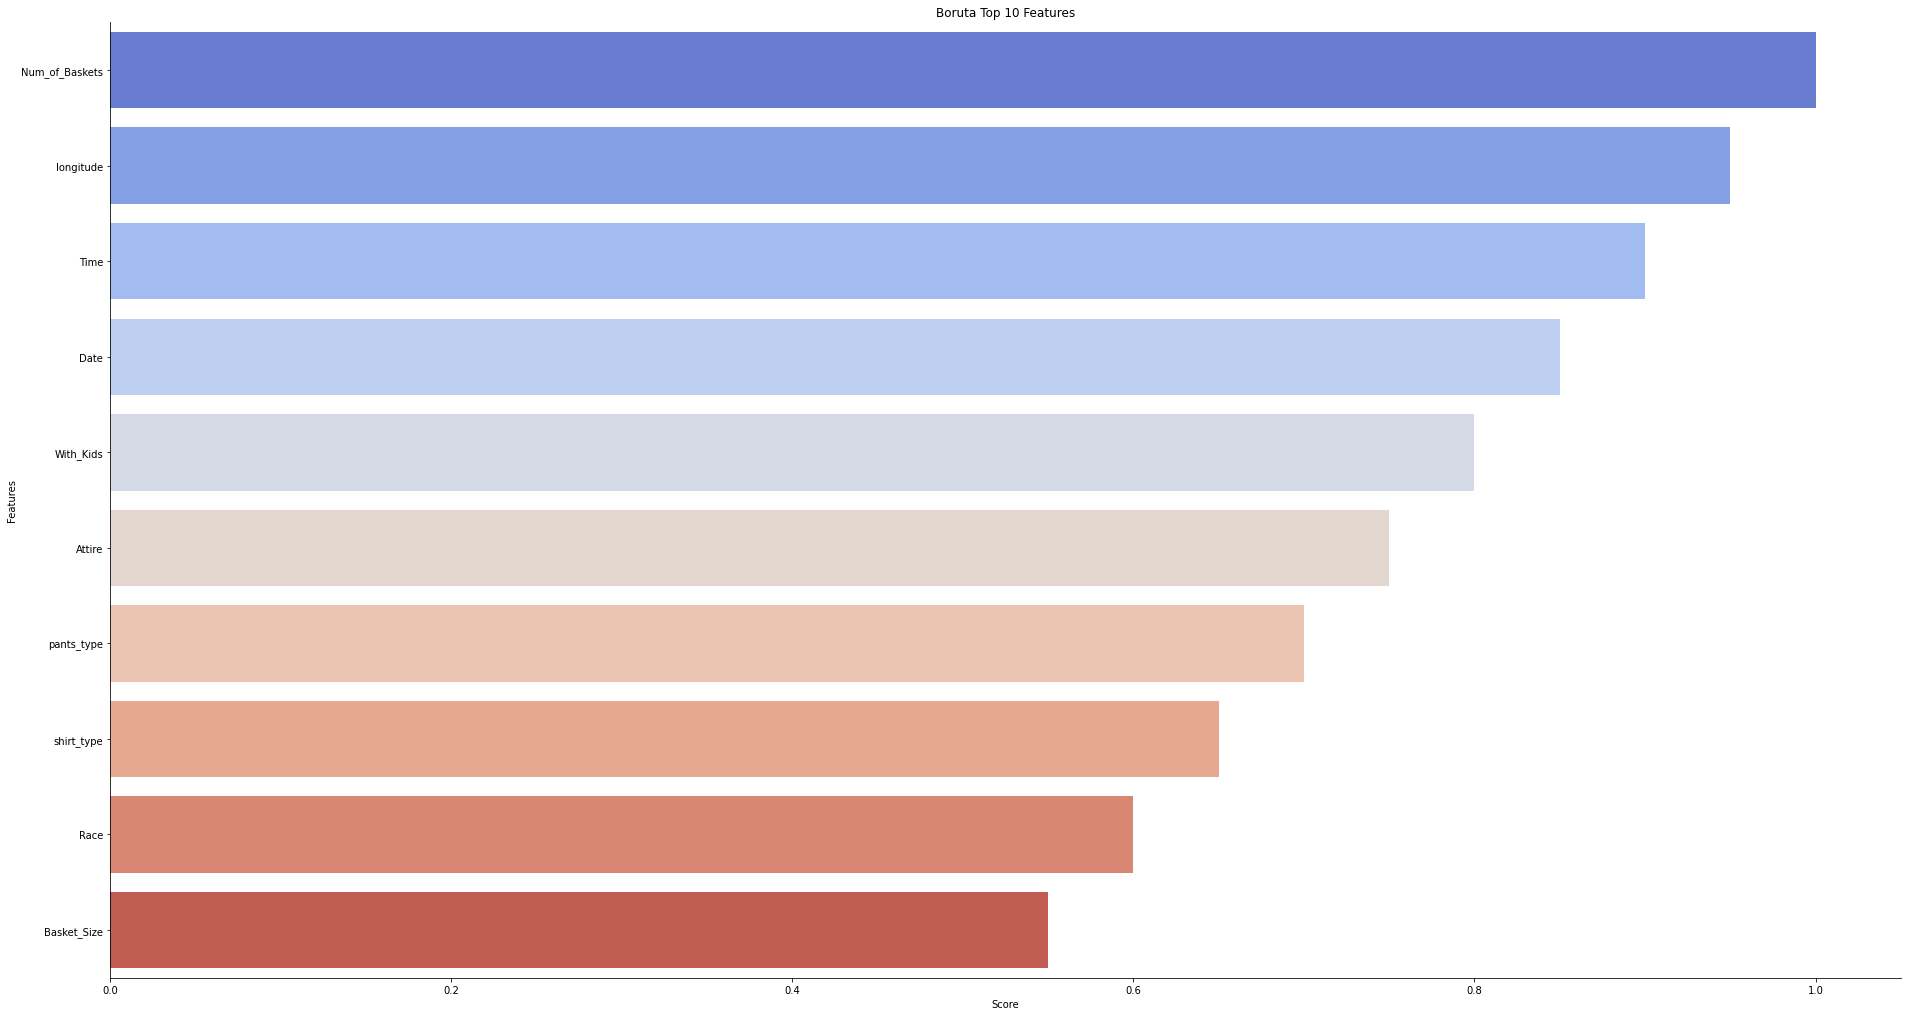

In [77]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:10], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 10 Features")
sns_boruta_plot.figure.savefig('Baskets_Boruta.png')

In [78]:
feat_selector.fit(X1.values, y1.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=56, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1E8F4573140),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1E8F4573140)

In [79]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [80]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
display(boruta_score.tail(10))
pd.DataFrame.to_csv(boruta_score.head(10), 'Age_Boruta_Top10.csv')

---------Top 10----------


,Features,Score
0,Date,1.00
18,latitude,1.00
1,Time,0.95
19,longitude,0.89
12,Pants_Colour,0.84
8,Basket_colour,0.79
6,Kids_Category,0.74
10,Shirt_Colour,0.68
9,Attire,0.63
14,Wash_Item,0.58


---------Bottom 10----------


,Features,Score
16,Dryer_No,0.47
15,Washer_No,0.42
4,Body_Size,0.37
20,Num_of_Baskets,0.32
7,Basket_Size,0.26
5,With_Kids,0.21
13,pants_type,0.16
11,shirt_type,0.11
17,Spectacles,0.11
3,Gender,0.00


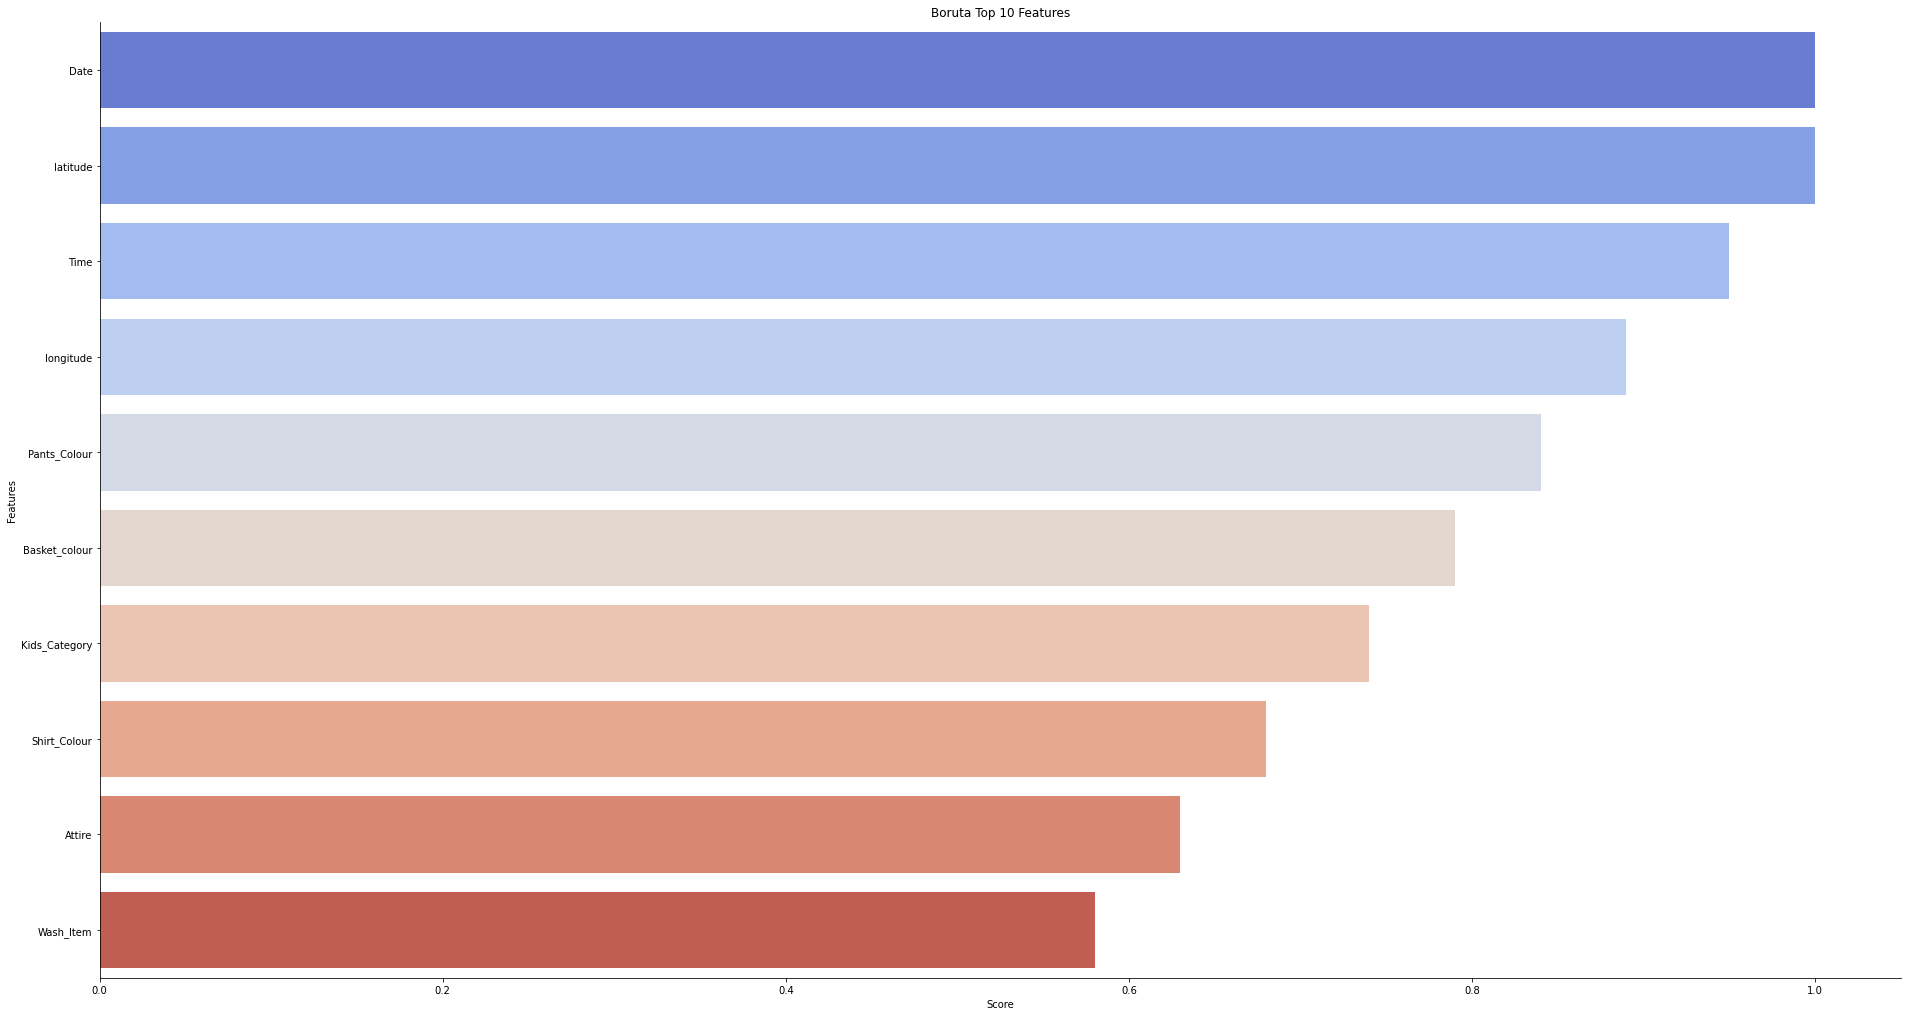

In [81]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:10], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 10 Features")
sns_boruta_plot.figure.savefig('Age_Boruta.png')

### Feature Selection(RFE)

In [68]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
rf.fit(X, y)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)

In [69]:
rfe.fit(X, y)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [70]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

In [71]:
print('---------Top 10----------')
display(rfe_score.head(10))

print('---------Bottom 10----------')
display(rfe_score.tail(10))
pd.DataFrame.to_csv(rfe_score.head(10), 'Baskets_RFE_Top10.csv')

---------Top 10----------


,Features,Score
0,Date,1.0
1,Time,1.0
19,longitude,1.0
17,Spectacles,1.0
16,Dryer_No,1.0
14,Wash_Item,1.0
13,pants_type,1.0
12,Pants_Colour,1.0
11,shirt_type,1.0
10,Shirt_Colour,1.0


---------Bottom 10----------


,Features,Score
8,Basket_colour,1.00
7,Basket_Size,1.00
5,With_Kids,1.00
4,Body_Size,1.00
3,Gender,1.00
2,Race,1.00
20,Num_of_Baskets,1.00
15,Washer_No,0.67
18,latitude,0.33
6,Kids_Category,0.00


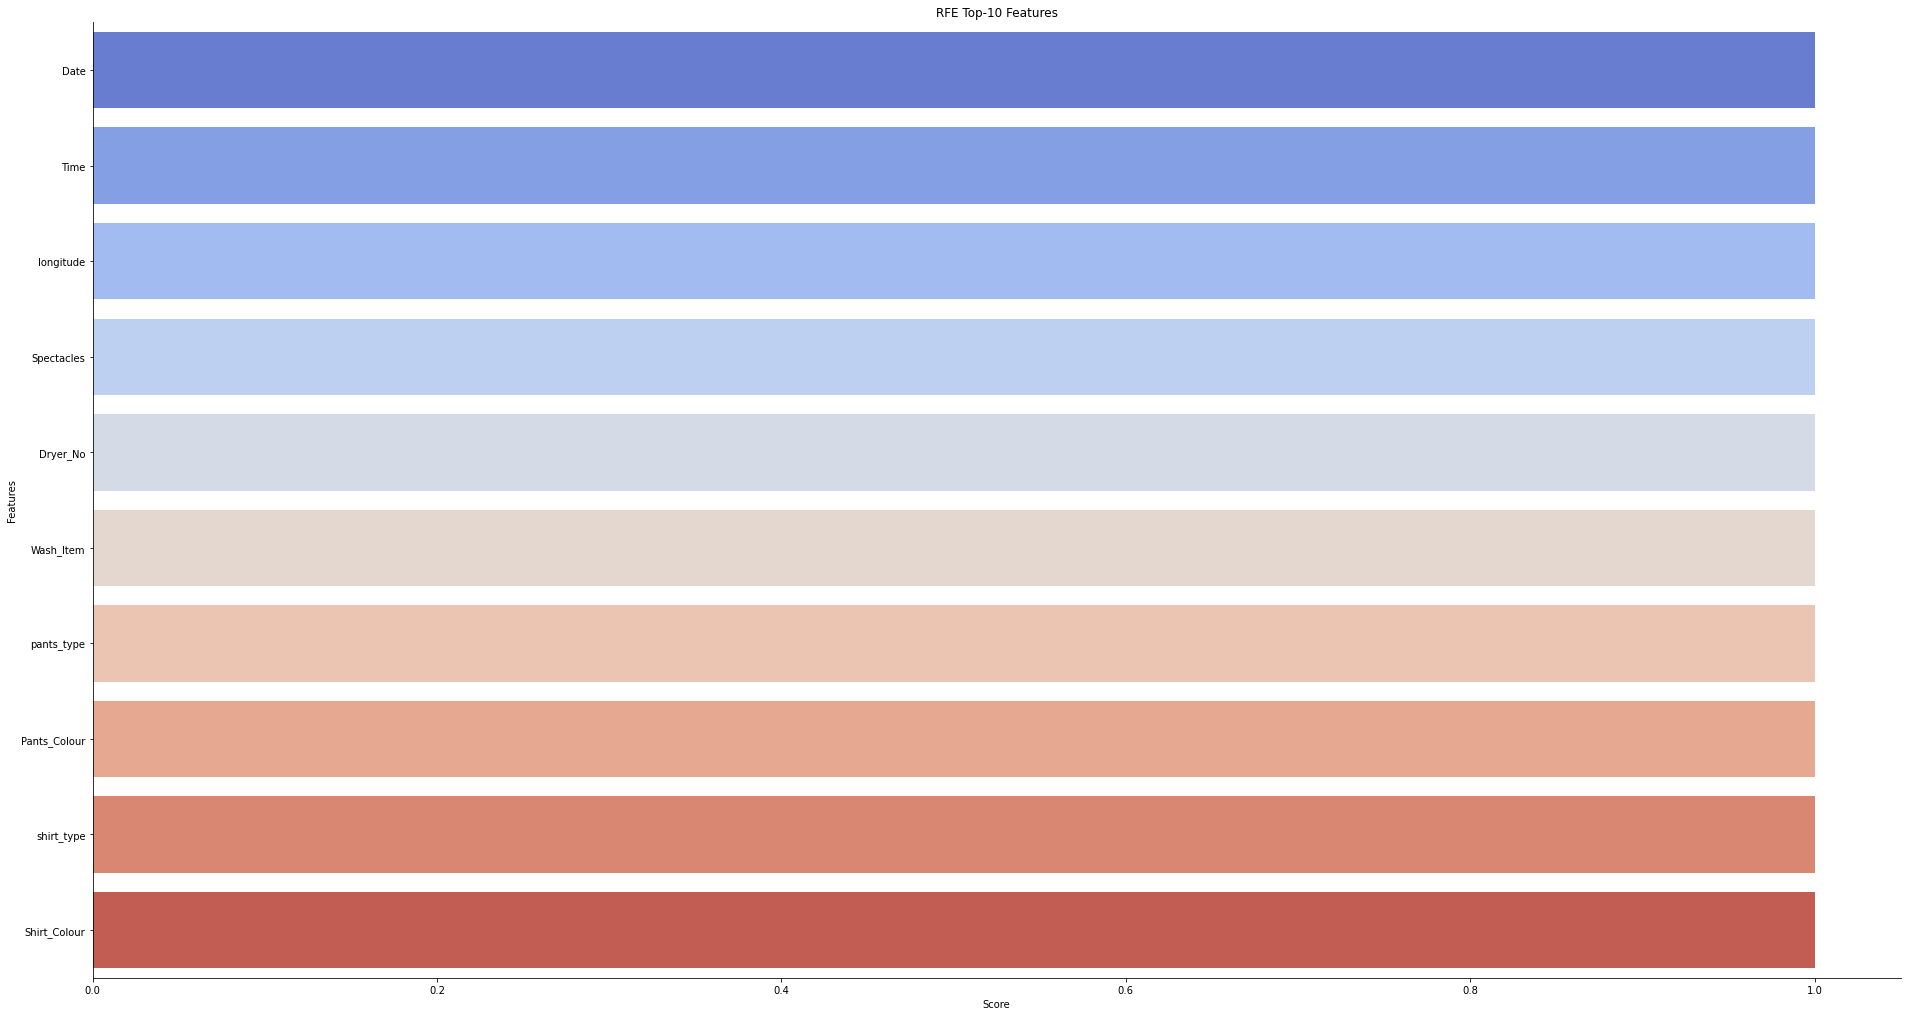

In [72]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:10], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top-10 Features")
sns_rfe_plot.figure.savefig('Baskets_RFE.png')

In [73]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
rf.fit(X1, y1)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)

In [74]:
rfe.fit(X1, y1)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [75]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

In [76]:
print('---------Top 10----------')
display(rfe_score.head(10))

print('---------Bottom 10----------')
display(rfe_score.tail(10))
pd.DataFrame.to_csv(rfe_score.head(10), 'Age_RFE_Top10.csv')

---------Top 10----------


,Features,Score
18,latitude,1.00
0,Date,0.95
19,longitude,0.90
1,Time,0.85
12,Pants_Colour,0.80
10,Shirt_Colour,0.75
8,Basket_colour,0.70
14,Wash_Item,0.65
6,Kids_Category,0.60
2,Race,0.55


---------Bottom 10----------


,Features,Score
16,Dryer_No,0.45
4,Body_Size,0.40
20,Num_of_Baskets,0.35
15,Washer_No,0.30
5,With_Kids,0.25
17,Spectacles,0.20
13,pants_type,0.15
7,Basket_Size,0.10
11,shirt_type,0.05
3,Gender,0.00


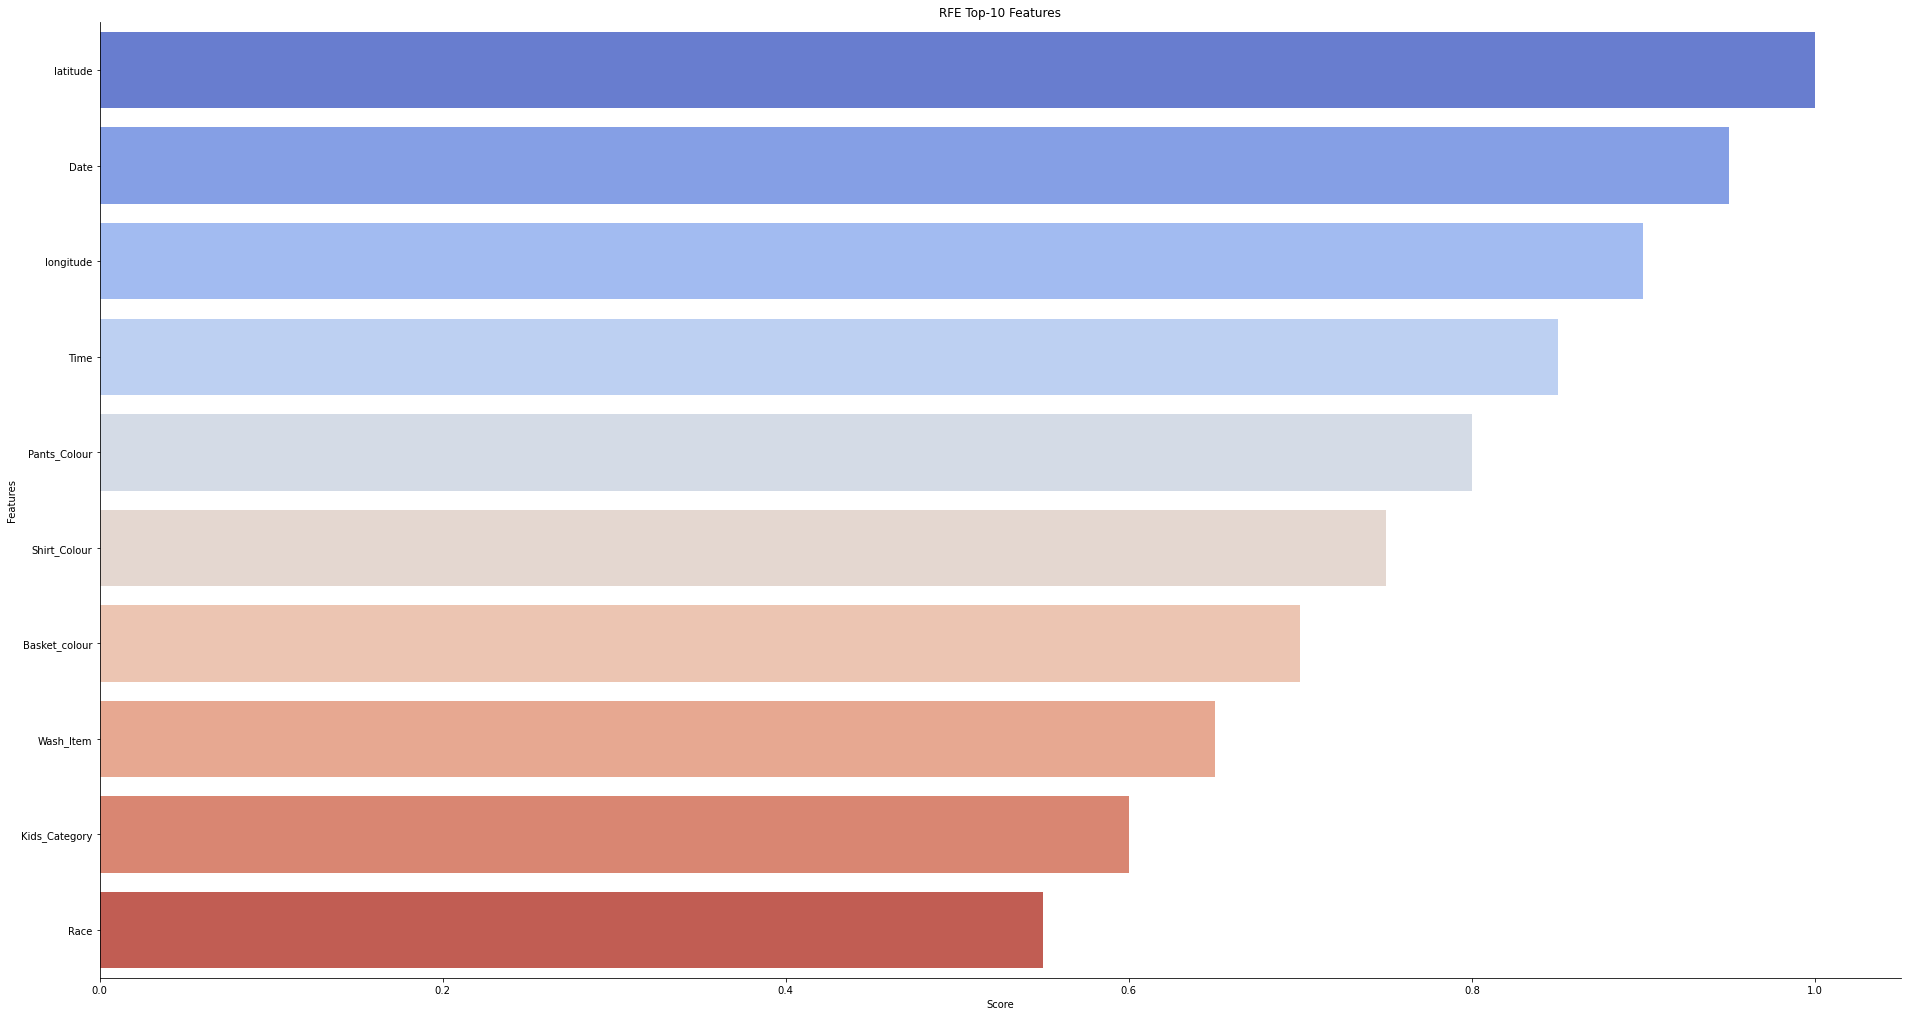

In [77]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:10], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top-10 Features")
sns_rfe_plot.figure.savefig('Age_RFE.png')

### Classification for Num_of_Baskets

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10) 

In [79]:
y.shape

(3818,)

In [80]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_NB = nb.predict_proba(X_test)
#prob_NB = prob_NB[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test))
print(sk_report)

Accuracy on training set: 0.371
Accuracy on test set: 0.336
Mjority classifier Confusion Matrix
 [[ 77  78  93]
 [ 88  78  85]
 [ 84  79 102]]
              precision    recall  f1-score   support

           0   0.309237  0.310484  0.309859       248
           1   0.331915  0.310757  0.320988       251
           2   0.364286  0.384906  0.374312       265

    accuracy                       0.336387       764
   macro avg   0.335146  0.335382  0.335053       764
weighted avg   0.335782  0.336387  0.335871       764



In [81]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'BASKETS_NB_Report.csv')

Class 0 ROC AUC OvR: 0.4789
Class 1 ROC AUC OvR: 0.5125
Class 2 ROC AUC OvR: 0.5073
Average ROC AUC OvR: 0.4996


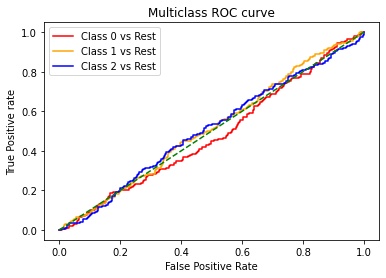

In [82]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()
classes = nb.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_NB[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_NB[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('BASKETS_NB_ROC.png')

In [83]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_RF = rf.predict_proba(X_test)
#prob_RF = prob_RF[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test))
print(sk_report)

Accuracy on training set: 0.668
Accuracy on test set: 0.322
Mjority classifier Confusion Matrix
 [[101  79  68]
 [107  71  73]
 [101  90  74]]
              precision    recall  f1-score   support

           0   0.326861  0.407258  0.362657       248
           1   0.295833  0.282869  0.289206       251
           2   0.344186  0.279245  0.308333       265

    accuracy                       0.321990       764
   macro avg   0.322293  0.323124  0.320065       764
weighted avg   0.322677  0.321990  0.319683       764



In [84]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'BASKETS_RF_Report.csv')

Class 0 ROC AUC OvR: 0.4768
Class 1 ROC AUC OvR: 0.5048
Class 2 ROC AUC OvR: 0.5017
Average ROC AUC OvR: 0.4945


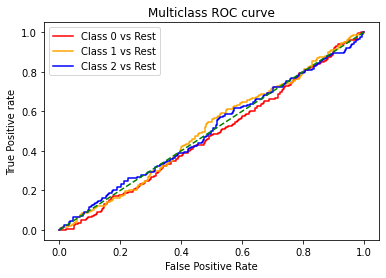

In [85]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()
classes = rf.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('BASKETS_RF_ROC.png')

In [86]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_KNN = KNN.predict_proba(X_test)
#prob_KNN = prob_KNN[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test))
print(sk_report)

Accuracy on training set: 0.649
Accuracy on test set: 0.339
Mjority classifier Confusion Matrix
 [[117  59  72]
 [116  73  62]
 [126  70  69]]
              precision    recall  f1-score   support

           0   0.325905  0.471774  0.385502       248
           1   0.361386  0.290837  0.322296       251
           2   0.339901  0.260377  0.294872       265

    accuracy                       0.339005       764
   macro avg   0.342398  0.340996  0.334223       764
weighted avg   0.342417  0.339005  0.333301       764



In [87]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'BASKETS_KNN_Report.csv')

Class 0 ROC AUC OvR: 0.4964
Class 1 ROC AUC OvR: 0.5296
Class 2 ROC AUC OvR: 0.4930
Average ROC AUC OvR: 0.5063


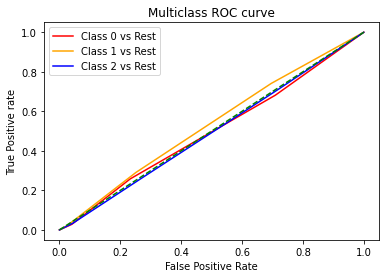

In [88]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()
classes = KNN.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_KNN[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_KNN[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('BASKETS_KNN_ROC.png')

### Classification for Num_of_Baskets with SMOTE

In [89]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.4, random_state=10)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Num_of_Baskets'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of 1 in oversampled data",len(os_data_y[os_data_y['Num_of_Baskets']==0]))
print("Number of 2",len(os_data_y[os_data_y['Num_of_Baskets']==1]))
print("Number of 3",len(os_data_y[os_data_y['Num_of_Baskets']==2]))
print("Proportion of 1 data in oversampled data is ",len(os_data_y[os_data_y['Num_of_Baskets']==0])/len(os_data_X))
print("Proportion of 2 data in oversampled data is ",len(os_data_y[os_data_y['Num_of_Baskets']==1])/len(os_data_X))
print("Proportion of 3 data in oversampled data is ",len(os_data_y[os_data_y['Num_of_Baskets']==2])/len(os_data_X))

length of oversampled data is  2322
Number of 1 in oversampled data 774
Number of 2 774
Number of 3 774
Proportion of 1 data in oversampled data is  0.3333333333333333
Proportion of 2 data in oversampled data is  0.3333333333333333
Proportion of 3 data in oversampled data is  0.3333333333333333


In [90]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.4, random_state=10)

In [91]:
y_test = y_test.squeeze()

In [92]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_NB = nb.predict_proba(X_test)
#prob_NB = prob_NB[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test))
print(sk_report)

Accuracy on training set: 0.399
Accuracy on test set: 0.346
Mjority classifier Confusion Matrix
 [[114  97  98]
 [104 106  90]
 [114 105 101]]
              precision    recall  f1-score   support

           0   0.343373  0.368932  0.355694       309
           1   0.344156  0.353333  0.348684       300
           2   0.349481  0.315625  0.331691       320

    accuracy                       0.345533       929
   macro avg   0.345670  0.345963  0.345357       929
weighted avg   0.345730  0.345533  0.345163       929



In [93]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'SMOTE_BASKETS_NB_Report.csv')

Class 0 ROC AUC OvR: 0.5248
Class 1 ROC AUC OvR: 0.5164
Class 2 ROC AUC OvR: 0.5150
Average ROC AUC OvR: 0.5188


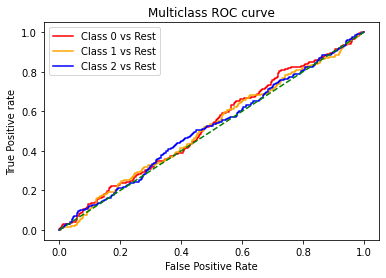

In [94]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()
classes = nb.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_NB[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_NB[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('SMOTE_BASKETS_NB_ROC.png')

In [95]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_RF = rf.predict_proba(X_test)
#prob_RF = prob_RF[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test))
print(sk_report)

Accuracy on training set: 0.769
Accuracy on test set: 0.349
Mjority classifier Confusion Matrix
 [[118 102  89]
 [ 95 120  85]
 [ 93 141  86]]
              precision    recall  f1-score   support

           0   0.385621  0.381877  0.383740       309
           1   0.330579  0.400000  0.361991       300
           2   0.330769  0.268750  0.296552       320

    accuracy                       0.348762       929
   macro avg   0.348990  0.350209  0.347428       929
weighted avg   0.348952  0.348762  0.346684       929



In [96]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'SMOTE_BASKETS_RF_Report.csv')

Class 0 ROC AUC OvR: 0.5531
Class 1 ROC AUC OvR: 0.5245
Class 2 ROC AUC OvR: 0.5070
Average ROC AUC OvR: 0.5282


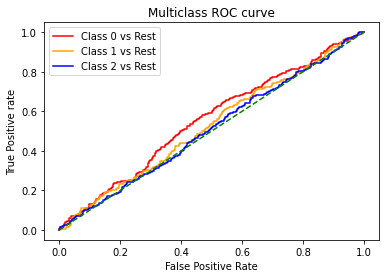

In [97]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()
classes = rf.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('SMOTE_BASKETS_RF_ROC.png')

In [98]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_KNN = KNN.predict_proba(X_test)
#prob_KNN = prob_KNN[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test))
print(sk_report)

Accuracy on training set: 0.650
Accuracy on test set: 0.355
Mjority classifier Confusion Matrix
 [[156  84  69]
 [155  86  59]
 [157  75  88]]
              precision    recall  f1-score   support

           0   0.333333  0.504854  0.401544       309
           1   0.351020  0.286667  0.315596       300
           2   0.407407  0.275000  0.328358       320

    accuracy                       0.355221       929
   macro avg   0.363920  0.355507  0.348500       929
weighted avg   0.364560  0.355221  0.348580       929



In [99]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'SMOTE_BASKETS_KNN_Report.csv')

Class 0 ROC AUC OvR: 0.5296
Class 1 ROC AUC OvR: 0.5147
Class 2 ROC AUC OvR: 0.5583
Average ROC AUC OvR: 0.5342


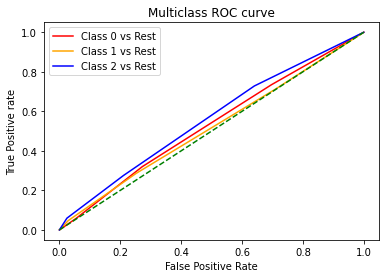

In [100]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()
classes = KNN.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_KNN[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_KNN[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
  
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('SMOTE_BASKETS_KNN_ROC.png')

### Classification for Age_Range

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 10) 

In [102]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_NB = nb.predict_proba(X_test)
#prob_NB = prob_NB[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test))
print(sk_report)

Accuracy on training set: 0.294
Accuracy on test set: 0.263
Mjority classifier Confusion Matrix
 [[ 0 15  5 13  5]
 [ 0 93 15 43 20]
 [ 0 78 27 78 11]
 [ 0 88 33 67 14]
 [ 0 80 24 47 16]]
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000        38
           1   0.262712  0.543860  0.354286       171
           2   0.259615  0.139175  0.181208       194
           3   0.270161  0.331683  0.297778       202
           4   0.242424  0.095808  0.137339       167

    accuracy                       0.262953       772
   macro avg   0.206983  0.222105  0.194122       772
weighted avg   0.246563  0.262953  0.231637       772



In [103]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'AGE_NB_Report.csv')

Class 0 ROC AUC OvR: 0.4900
Class 1 ROC AUC OvR: 0.5908
Class 2 ROC AUC OvR: 0.5489
Class 3 ROC AUC OvR: 0.5083
Class 4 ROC AUC OvR: 0.5254
Average ROC AUC OvR: 0.5327


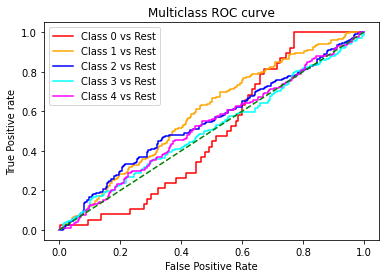

In [104]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df1['Binned_Age_Range'].nunique()
classes = nb.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_NB[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_NB[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('AGE_NB_ROC.png')

In [105]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_RF = rf.predict_proba(X_test)
#prob_RF = prob_RF[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test))
print(sk_report)

Accuracy on training set: 0.500
Accuracy on test set: 0.253
Mjority classifier Confusion Matrix
 [[  0  14   3  20   1]
 [  0  72   9  83   7]
 [  0  70   9 111   4]
 [  0  79   9 103  11]
 [  0  70  12  74  11]]
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000        38
           1   0.236066  0.421053  0.302521       171
           2   0.214286  0.046392  0.076271       194
           3   0.263427  0.509901  0.347386       202
           4   0.323529  0.065868  0.109453       167

    accuracy                       0.252591       772
   macro avg   0.207462  0.208643  0.167126       772
weighted avg   0.245052  0.252591  0.200749       772



In [106]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'AGE_RF_Report.csv')

Class 0 ROC AUC OvR: 0.5201
Class 1 ROC AUC OvR: 0.5644
Class 2 ROC AUC OvR: 0.5523
Class 3 ROC AUC OvR: 0.5156
Class 4 ROC AUC OvR: 0.5275
Average ROC AUC OvR: 0.5360


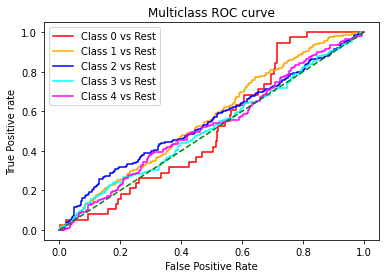

In [107]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df1['Binned_Age_Range'].nunique()
classes = rf.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
     
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('AGE_RF_ROC.png')

In [108]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_KNN = KNN.predict_proba(X_test)
#prob_KNN = prob_KNN[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test))
print(sk_report)

Accuracy on training set: 0.550
Accuracy on test set: 0.219
Mjority classifier Confusion Matrix
 [[ 6 14  8  3  7]
 [23 60 33 31 24]
 [20 60 42 47 25]
 [24 68 50 38 22]
 [22 58 37 27 23]]
              precision    recall  f1-score   support

           0   0.063158  0.157895  0.090226        38
           1   0.230769  0.350877  0.278422       171
           2   0.247059  0.216495  0.230769       194
           3   0.260274  0.188119  0.218391       202
           4   0.227723  0.137725  0.171642       167

    accuracy                       0.218912       772
   macro avg   0.205797  0.210222  0.197890       772
weighted avg   0.233674  0.218912  0.218377       772



In [109]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'AGE_KNN_Report.csv')

Class 0 ROC AUC OvR: 0.5361
Class 1 ROC AUC OvR: 0.5265
Class 2 ROC AUC OvR: 0.4953
Class 3 ROC AUC OvR: 0.4828
Class 4 ROC AUC OvR: 0.5279
Average ROC AUC OvR: 0.5137


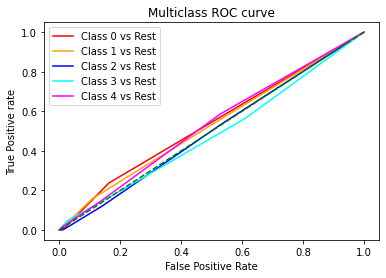

In [110]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df1['Binned_Age_Range'].nunique()
classes = KNN.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_KNN[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_KNN[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
       
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('AGE_KNN_ROC.png')

### Classification for Age_Range with SMOTE

In [111]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X1, y1.values.ravel(), test_size=0.4, random_state=10)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Binned_Age_Range'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of 0 in oversampled data",len(os_data_y[os_data_y['Binned_Age_Range']==0]))
print("Number of 1",len(os_data_y[os_data_y['Binned_Age_Range']==1]))
print("Number of 2",len(os_data_y[os_data_y['Binned_Age_Range']==2]))
print("Number of 3",len(os_data_y[os_data_y['Binned_Age_Range']==3]))
print("Number of 4",len(os_data_y[os_data_y['Binned_Age_Range']==4]))
print("Proportion of 0 data in oversampled data is ",len(os_data_y[os_data_y['Binned_Age_Range']==0])/len(os_data_X))
print("Proportion of 1 data in oversampled data is ",len(os_data_y[os_data_y['Binned_Age_Range']==1])/len(os_data_X))
print("Proportion of 2 data in oversampled data is ",len(os_data_y[os_data_y['Binned_Age_Range']==2])/len(os_data_X))
print("Proportion of 3 data in oversampled data is ",len(os_data_y[os_data_y['Binned_Age_Range']==3])/len(os_data_X))
print("Proportion of 4 data in oversampled data is ",len(os_data_y[os_data_y['Binned_Age_Range']==4])/len(os_data_X))

length of oversampled data is  3095
Number of 0 in oversampled data 619
Number of 1 619
Number of 2 619
Number of 3 619
Number of 4 619
Proportion of 0 data in oversampled data is  0.2
Proportion of 1 data in oversampled data is  0.2
Proportion of 2 data in oversampled data is  0.2
Proportion of 3 data in oversampled data is  0.2
Proportion of 4 data in oversampled data is  0.2


In [112]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.4, random_state=10)

In [113]:
y_test = y_test.squeeze()

In [114]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_NB = nb.predict_proba(X_test)
#prob_NB = prob_NB[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test))
print(sk_report)

auc_NB = roc_auc_score(y_test, prob_NB, multi_class='ovr')
print('AUC: %.2f' % auc_NB)

Accuracy on training set: 0.361
Accuracy on test set: 0.314
Mjority classifier Confusion Matrix
 [[161  48  13  16  22]
 [ 57  73  26  54  25]
 [ 36  82  47  69  24]
 [ 26  70  40  83  34]
 [ 53  65  31  58  25]]
              precision    recall  f1-score   support

           0   0.483483  0.619231  0.543002       260
           1   0.215976  0.310638  0.254799       235
           2   0.299363  0.182171  0.226506       258
           3   0.296429  0.328063  0.311445       253
           4   0.192308  0.107759  0.138122       232

    accuracy                       0.314216      1238
   macro avg   0.297512  0.309572  0.294775      1238
weighted avg   0.301541  0.314216  0.299141      1238

AUC: 0.64


In [115]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'SMOTE_AGE_NB_Report.csv')

Class 0 ROC AUC OvR: 0.8051
Class 1 ROC AUC OvR: 0.5772
Class 2 ROC AUC OvR: 0.6172
Class 3 ROC AUC OvR: 0.6560
Class 4 ROC AUC OvR: 0.5295
Average ROC AUC OvR: 0.6370


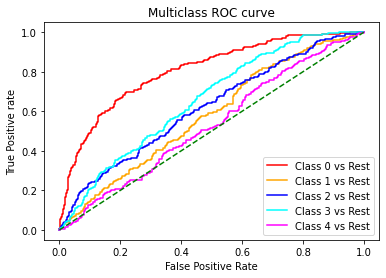

In [116]:
fpr = {}
tpr = {}
thresh ={}
classes = nb.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_NB[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_NB[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
       
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('SMOTE_AGE_NB_ROC.png')

In [117]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_RF = rf.predict_proba(X_test)
#prob_RF = prob_RF[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test))
print(sk_report)

Accuracy on training set: 0.565
Accuracy on test set: 0.330
Mjority classifier Confusion Matrix
 [[183  62   1   5   9]
 [ 72 105  14  24  20]
 [ 47  95  26  60  30]
 [ 39  88  29  66  31]
 [ 68  87  20  28  29]]
              precision    recall  f1-score   support

           0   0.447433  0.703846  0.547085       260
           1   0.240275  0.446809  0.312500       235
           2   0.288889  0.100775  0.149425       258
           3   0.360656  0.260870  0.302752       253
           4   0.243697  0.125000  0.165242       232

    accuracy                       0.330372      1238
   macro avg   0.316190  0.327460  0.295401      1238
weighted avg   0.319155  0.330372  0.298194      1238



In [118]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'SMOTE_AGE_RF_Report.csv')

Class 0 ROC AUC OvR: 0.8308
Class 1 ROC AUC OvR: 0.5885
Class 2 ROC AUC OvR: 0.6425
Class 3 ROC AUC OvR: 0.6676
Class 4 ROC AUC OvR: 0.5324
Average ROC AUC OvR: 0.6524


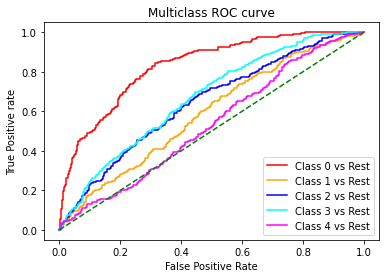

In [119]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df1['Binned_Age_Range'].nunique()
classes = rf.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
        
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('SMOTE_AGE_RF_ROC.png')

In [120]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_KNN = KNN.predict_proba(X_test)
#prob_KNN = prob_KNN[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test))
print(sk_report)

Accuracy on training set: 0.634
Accuracy on test set: 0.379
Mjority classifier Confusion Matrix
 [[207  25   9   7  12]
 [ 56  94  26  33  26]
 [ 42  75  65  44  32]
 [ 57  78  46  45  27]
 [ 58  58  34  24  58]]
              precision    recall  f1-score   support

           0   0.492857  0.796154  0.608824       260
           1   0.284848  0.400000  0.332743       235
           2   0.361111  0.251938  0.296804       258
           3   0.294118  0.177866  0.221675       253
           4   0.374194  0.250000  0.299742       232

    accuracy                       0.378837      1238
   macro avg   0.361426  0.375191  0.351957      1238
weighted avg   0.363064  0.378837  0.354352      1238



In [121]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test), 
    output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'SMOTE_AGE_KNN_Report.csv')

Class 0 ROC AUC OvR: 0.8410
Class 1 ROC AUC OvR: 0.6494
Class 2 ROC AUC OvR: 0.5998
Class 3 ROC AUC OvR: 0.5866
Class 4 ROC AUC OvR: 0.5988
Average ROC AUC OvR: 0.6551


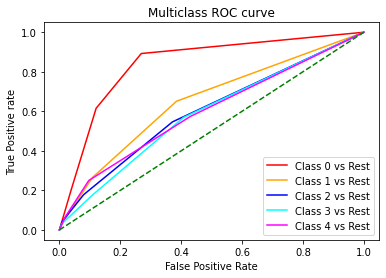

In [122]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df1['Binned_Age_Range'].nunique()
classes = KNN.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_KNN[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_KNN[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
       
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('SMOTE_AGE_KNN_ROC.png')

### Regression for Age Range

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 10) 

In [124]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
regressor = SVR(kernel = 'rbf')

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Accuracy on training set: {:.3f}".format(regressor.score(X_train, y_train)))

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

Accuracy on training set: 0.014
10.23561709468476
140.8668354505676


<AxesSubplot:xlabel='Age_Range'>

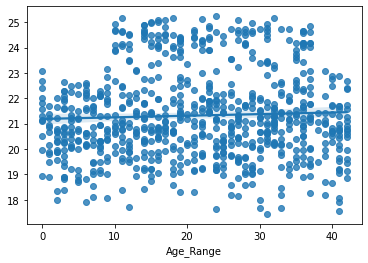

In [125]:
sns.regplot(y_test, y_pred, data=new_df1)

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
dtr1 = DecisionTreeRegressor(max_depth=7)
dtr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [128]:
drt_y_pred = dtr1.predict(X_test)
print("Accuracy on training set: {:.3f}".format(dtr1.score(X_train, y_train)))

print(mean_absolute_error(y_test, drt_y_pred))
print(mean_squared_error(y_test, drt_y_pred))

Accuracy on training set: 0.146
10.643408387772734
161.10450398868548


<AxesSubplot:xlabel='Age_Range'>

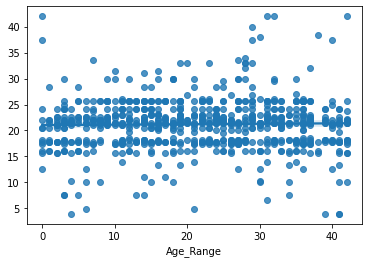

In [129]:
sns.regplot(y_test, drt_y_pred, data=new_df1)

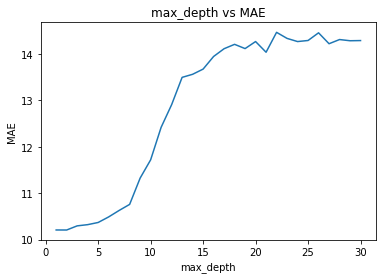

In [130]:
depth = 30
max_depth = [i for i in range(1,depth+1)] 
dtr_mae = [] 
for i in range(1,depth+1):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    dtr_y_pred = dtr.predict(X_test)
    dtr_mae.append(mean_absolute_error(y_test, dtr_y_pred))
    
plt.plot(max_depth, dtr_mae)
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('max_depth vs MAE')   
plt.show()

# Neural Net (Age Range - Binned)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from tensorflow.keras.utils import to_categorical
from iteration_utilities import deepflatten

In [ ]:
sc = StandardScaler()
X_ss = sc.fit_transform(X1)
print(X_ss)

In [ ]:
y_one_hot = to_categorical(y1)
 
# Show the category label after one-hot encoding
print('Original label 0 : ', y1[0])
print('After conversion to categorical ( one-hot ) : ', y_one_hot[0])

In [ ]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_ss, y_one_hot, test_size = 0.1, shuffle= True)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=21, activation='relu'))
model.add(Dense(8, activation = "relu"))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=200, batch_size=64)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Neural Net (Number of baskets)

In [ ]:
sc = StandardScaler()
X_ss = sc.fit_transform(X)
print(X_ss)

In [ ]:
y_one_hot = to_categorical(y)
 
# Show the category label after one-hot encoding
print('Original label 0 : ', y[0])
print('After conversion to categorical ( one-hot ) : ', y_one_hot[0])

In [ ]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_ss, y_one_hot, test_size = 0.1, shuffle= True)

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=21, activation='relu'))
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=200, batch_size=64)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()